张量是PyTorch中数据的基础。神经网络将张量输入并产生张量作为输出。实际上，神经网络内部和优化期间的所有操作都是张量之间的操作，而神经网络中的所有参数（例如权重和偏差）也都是张量

在将数据输入模型之前。我们鼓励你保留这些数据集。当你开始学习如何训练神经网络模型时，它们将成为极好的数据集。

假设不是时间序列的话，通常表是独立样本的集合，而在时间序列中，样本是在时间维度上相关的


列可以包含数值型数据（例如特定位置的温度）或标签（例如表示样品属性的字符串，比如“蓝色”）。因此，表格数据通常不是同质的（homogeneous），不同的列有不同的类型。

然而，PyTorch张量是同质的。其他数据科学软件包，例如Pandas，具有dataframe的概念，dataframe即用异构（heterogenous）的列来表示数据的对象。相比之下，PyTorch中的信息被编码为数字，通常为浮点数（尽管也支持整数类型）。（PyTorch中的）数值编码是有意为之的，因为神经网络是将实数作为输入并通过连续应用矩阵乘法和非线性函数产生实数作为输出的数学实体。


因此，作为深度学习从业人员，你的第一项工作是将异构的现实世界数据编码成浮点数张量以供神经网络使用。

免费数据集
https://github.com/awesomedata/awesome-public-datasets

---

本堂内容所用数据集 https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
该文件包含用逗号分隔的值的集合，总共12列，第一行是包含列名称的标题行。前11列包含化学变量的值。最后一列包含从0（最差）到10（优秀）的感官质量得分.

实验数据集的列名顺序如下：fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality

---

针对此数据集可能的机器学习任务是通过化学表征来预测质量得分。

葡萄酒中硫（sulfur）与品质的关系
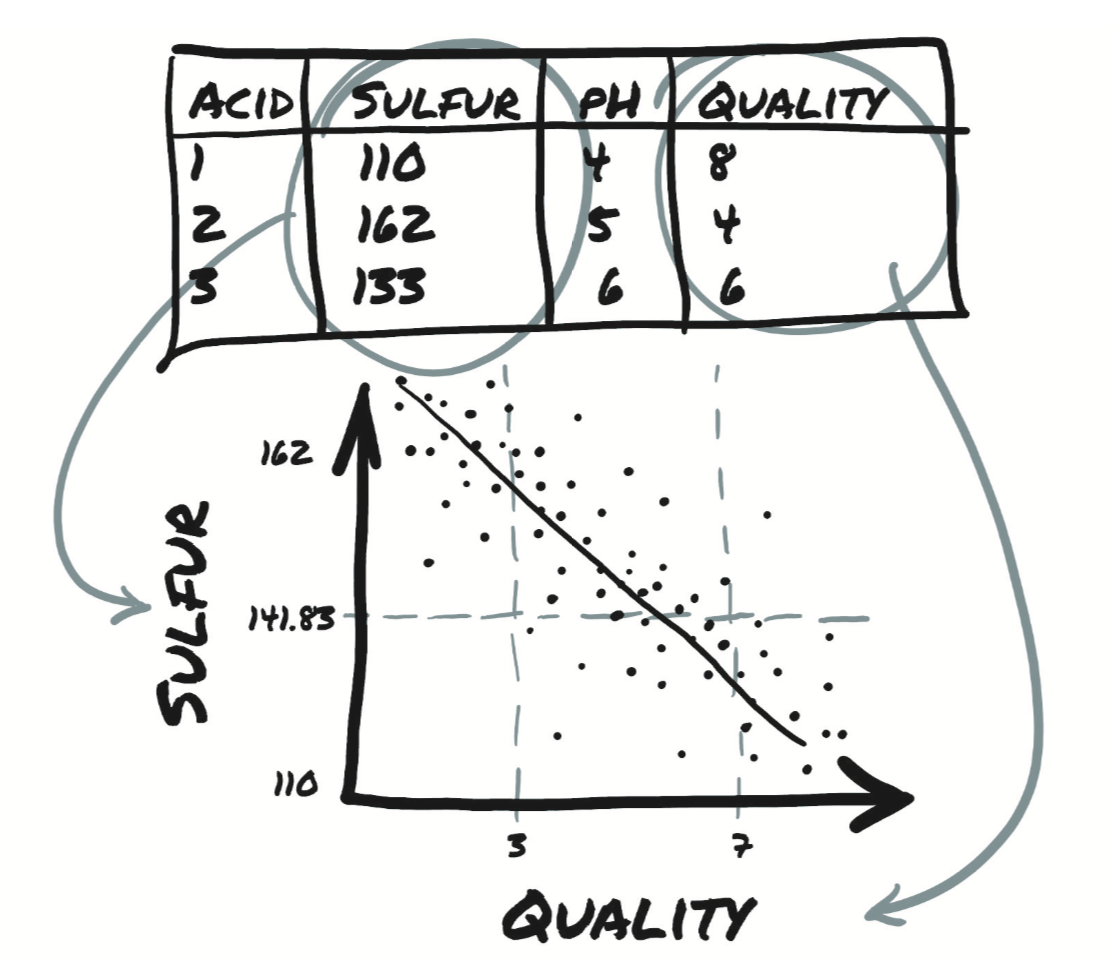

Python提供了多个选项来快速加载CSV文件。三种常用的选择是
- Python自带的csv模块
- NumPy
- Pandas  最省时和最省内存的方法

### 加载csv文件，并创建tensor

In [2]:
import numpy as np

In [6]:
# numpy加载csv
wine_path = "./data/chapter3/winequality-white.csv"
    # 忽略第一行。各行的定界符delimiter为'；'。
wineq_numpy = np.loadtxt(fname=wine_path,dtype=np.float32,delimiter=";",skiprows=1)  # delimiter 用于分割值的标志


In [9]:
wineq_numpy,wineq_numpy.shape

(array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
        [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
        [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
        [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
        [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32),
 (4898, 12))

In [12]:
# 保存csv文件的第一行(表头)
import csv

In [74]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))  #  从迭代器中拿出第一个行 

In [75]:
# 整体看下 各列名和数据尺寸
col_list,wineq_numpy.shape

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 (4898, 12))

In [76]:
# 将numpy格式的数据转为张量
import torch

In [77]:
wineq = torch.from_numpy(wineq_numpy)
wineq.size(),wineq.dtype

(torch.Size([4898, 12]), torch.float32)

#### 在尝试理解数据时，应注意三种数值。

- 第一种是连续（continuous）值。当以数字表示时，这些值是最直观的。它们是严格可排序的，各个值之间的差异具有严格的含义。

- 接下来是序数（ordinal）值。连续值的严格可排序性仍然保留，但是值之间的固定关系不再适用。一定要要记住，你不能对它们进行除了排序之外任何数学运算。

- 最后，类别（categorical）值既没有顺序也没有数值含义。这些值通常是可能性的枚举，并分配有任意数字。（尽管当我们讨论独热（one-hot）编码时将分配值的范围设置成0..N-1会很有优势）。

你可以将（葡萄酒质量分数）分数视为连续变量，视为实数，然后进行回归任务；或者将其视为标签，作为分类任务尝试从化学分析猜出该标签。在这两种方法中，往往都将分数从输入数据的张量中删除，并将其保存在单独的张量中，以便将分数用作ground truth而不将其输入到模型中。

### 预处理张量

In [80]:
# 最后一列是葡萄酒的质量分数 ，我们将其作为ground truth,用这些连续变量,做回归任务。
# 训练集  
data = wineq[:,:-1]  #除最后一列外的所有列  
# ground truth
target = wineq[:,-1]  # 只要最后一列

In [79]:
data.size(),target.size()

(torch.Size([4898, 11]), torch.Size([4898]))

#### 上述做回归任务。但如果把target张量转换为标签标量，做分类任务呢？
有两种方式：
- 方式一：将标签视为整数向量  target = wineq[:,-1].long()
- 方式二: 独热编码 scatter_方法 （神经网络中必须用方式二）

补充：pandas独热编码:features = pd.get_dummies(features)

### 特征缩放 (帮助收敛)

In [43]:
# 归一化


In [47]:
# 标准化 - 张量data的每列的均值和标准差
data_mean = torch.mean(data,dim=0 ) # 效果：计算了各个列的列均值 
data_var = torch.var(data,dim=0)

data_normalized = (data-data_mean)/torch.sqrt(data_var)
data_normalized

tensor([[ 1.7209e-01, -8.1764e-02,  2.1325e-01,  ..., -1.2468e+00,
         -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7991e-02,  ...,  7.3992e-01,
          1.3467e-03, -8.2418e-01],
        [ 1.4756e+00,  1.7448e-02,  5.4378e-01,  ...,  4.7502e-01,
         -4.3677e-01, -3.3662e-01],
        ...,
        [-4.2042e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3131e+00,
         -2.6152e-01, -9.0544e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0048e+00,
         -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7502e-01,
         -1.4882e+00,  1.0448e+00]])

In [49]:
# 举例解释 参数dim=0 面向维度0进行操作 是什么意思？  

 
p = torch.tensor([[1.0,1.0],[2.0,2.0]])
print("p : {}\n".format(p))
    #p.mean()是对全部的元素进行平均值  (1.0+1.0+2.0+2.0)/4  => 1.5
print("p.mean() : {}\n".format(p.mean()))
    # p.mean(dim=0) 是在dim=0维度上操作 
        # ([1.,1.] + [2.,2.])/2 => [3.,3.]/2  => [1.5,1.5] 
print("p.mean(dim=0) : {}\n".format(p.mean(dim=0)))
    #p.mean(dim=1) dim=1维度上操作 
        # [(1.+1.)/2 ,(2.+2.)/2 ] => [ 1.,2.]
print("p.mean(dim=1) : {}\n".format(p.mean(dim=1)))


p : tensor([[1., 1.],
        [2., 2.]])

p.mean() : 1.5

p.mean(dim=0) : tensor([1.5000, 1.5000])

p.mean(dim=1) : tensor([1., 2.])



### 审查数据

In [56]:
# 将数据分为等级.  分数 <=3 坏  3<&&<=7 中  7< 好  
bad_data = data[torch.le(target,3)]  #Less or Equal 小于等于
mid_data = data[torch.gt(target,3) & torch.lt(target,7)] # Greater Than大于，Less Than小于 
good_data = data[torch.ge(target,7)]  # Greater or Equal 大于等于

bad_data.shape,mid_data.shape,good_data.shape,

(torch.Size([20, 11]), torch.Size([3818, 11]), torch.Size([1060, 11]))

In [68]:
# 对每列取.mean
bad_mean = torch.mean(bad_data,dim=0)
mid_mean = torch.mean(mid_data,dim=0)
good_mean = torch.mean(good_data,dim=0)

# enumerate() 返回枚举对象
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [70]:
# 上述结果显示 total sulfur dioxide 因素的影响较大
    # 尝试使用total sulfur dioxide作为阈值来区分好坏的粗略标准
        # total sulfur dioxide的中值作为阈值
total_sulfur_threshold = mid_mean[6]
        # 获取数据中各行(各样本)的total sulfur dioxide数据(其在第6列)
total_sulfur_data = data[:,6]
        # 预测的坏酒的indexes 为低于该阈值的数据的indexes
predicted_indexes = torch.lt(total_sulfur_data,total_sulfur_threshold)
predicted_indexes.shape,predicted_indexes.dtype,predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [71]:
# 上面预测略微高于一半的酒是好酒。
# 真实情况如下：
actual_indexes = torch.gt(target,5)
actual_indexes.shape,actual_indexes.dtype,actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

现在，你需要查看预测与实际的吻合程度。在预测索引和实际索引之间执行逻辑与运算（请记住，每个索引都是0/1数组）得到交集，用这个交集来确定预测表现如何

In [72]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()
n_matches, n_matches / n_predicted, n_matches / n_actual


(2018, 0.74000733406674, 0.6193984039287906)

In [73]:
1 & 0 , 1 & 1, 0 & 0

(0, 1, 0)